# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** XXXX

**Author 1 (sciper):** XXXX (XXXXXX)  
**Author 2 (sciper):** XXXX (XXXXXX)   
**Author 3 (sciper):** XXXX (XXXXXX)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [2]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, "data")
data_folder = "lab-02-data"
data_part1 = os.path.join(data_base_path, data_folder, "part1")
data_part2 = os.path.join(data_base_path, data_folder, "part2")

tar_path = os.path.join(data_base_path, data_folder + ".tar.gz")
with tarfile.open(tar_path, mode="r:gz") as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

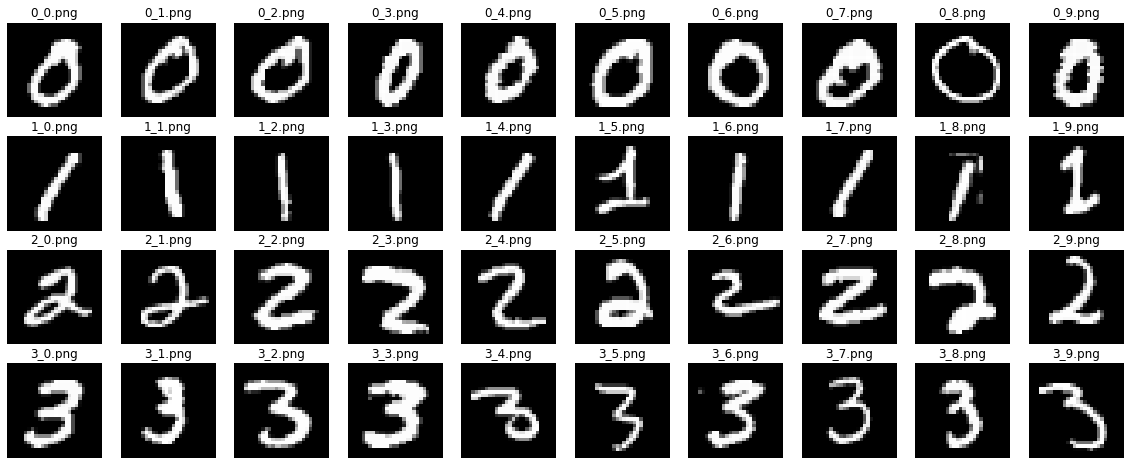

In [3]:
import skimage.io
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline


def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    # make sure to only load .png
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection(
        [os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names

# Load digits data


# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

plt.rcParams["figure.facecolor"] = "white"
# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)


---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

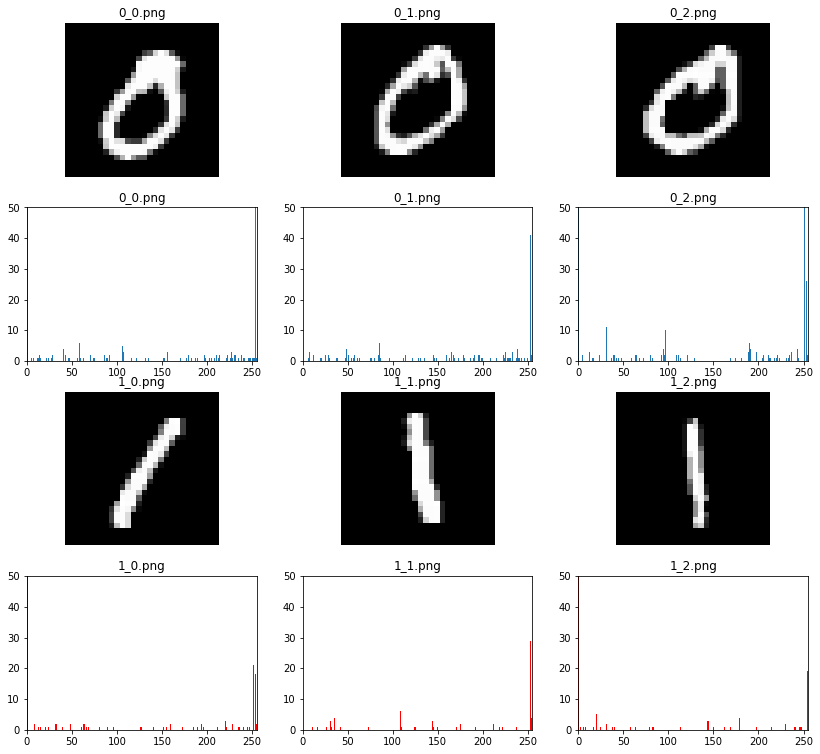

In [4]:
# Plot images and histograms
fig, axes = plt.subplots(4, len(zeros_im) - 7, figsize=(14, 13))
for ax, im, nm in zip(axes[0], zeros_im[:3], zeros_names[:3]):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], zeros_im[:3], zeros_names[:3]):
    ax.hist(im.ravel(), 255)
    ax.set_xlim([0, 255])
    ax.set_ylim([0, 50])

    ax.set_title(nm)
for ax, im, nm in zip(axes[2], ones_im[:3], ones_names[:3]):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im[:3], ones_names[:3]):
    ax.hist(im.ravel(), 255, color="r")
    ax.set_xlim([0, 255])
    ax.set_ylim([0, 50])
    ax.set_title(nm)

In [5]:
def preprocess(image, zero=False, threshold=100, median_blur=False):
    pre = skimage.morphology.opening(image, skimage.morphology.square(2))
    if median_blur:
        pre = skimage.filters.median(image, footprint=skimage.morphology.disk(1))
    if zero:
        pre = skimage.morphology.remove_small_holes(pre, 200)
        pre = pre.astype(np.uint8) * 255
    return pre

In [6]:
def threshold(image, t):
    img_thresholded = np.zeros_like(image)
    mask = image > t
    img_thresholded[mask] = 255
    return img_thresholded

C:\Users\User\AppData\Local\Temp\ipykernel_19052\4285932265.py:6: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  pre = skimage.morphology.remove_small_holes(pre,200)


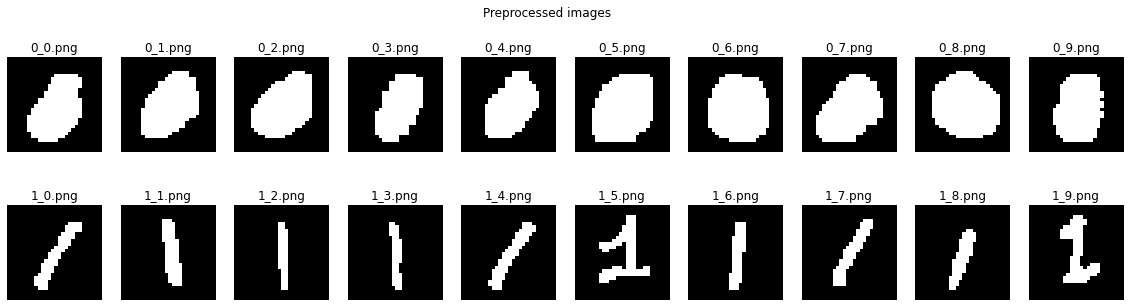

In [7]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s
zeros = []
ones = []

for img in zeros_im:
    img_pre = preprocess(img, True)
    img_th = threshold(img_pre, 20)
    zeros.append(img_th)
for img in ones_im:
    img_pre = preprocess(img)
    img_th = threshold(img_pre, 40)
    ones.append(img_th)

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

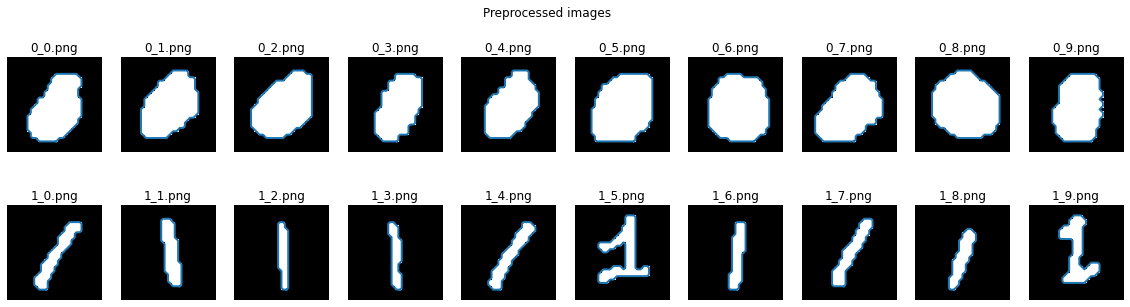

In [8]:
from skimage.measure import find_contours

fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap="gray")
    contours = find_contours(im)
    ax.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2)
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap="gray")
    contours = find_contours(im)
    ax.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2)
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

In [9]:
def d(c1, c2):
    return np.linalg.norm(c1 - c2)


def sample_contours(contours, distance):
    d_w = distance
    points = [contours[0][0]]
    d_c = 0

    for i in range(1, len(contours[0])):
        d_curr = d(contours[0][i], contours[0][i - 1])
        if d_c + d_curr >= d_w:
            a = d_c + d_curr - d_w
            a = a / d_curr
            points.append((1 - a) * contours[0][i] + (a) * contours[0][i - 1])
            d_c = d_curr + d_c - d_w
        else:
            d_c += d_curr

    points = np.array(points)
    return points

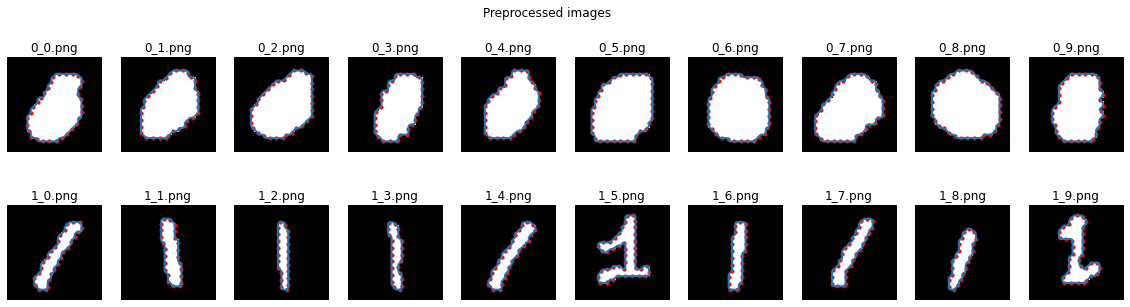

In [10]:
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap="gray")
    contours = find_contours(im)
    ax.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2)
    points = sample_contours(contours, 2)
    y, x = points.T
    ax.scatter(x, y, color="red", s=10)
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap="gray")
    contours = find_contours(im)
    ax.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2)
    points = sample_contours(contours, 2)
    y, x = points.T
    ax.scatter(x, y, color="red", s=10)
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

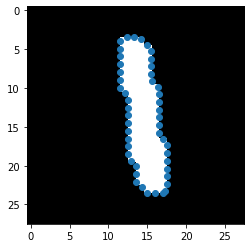

In [11]:
img_ = ones[1]

fig, ax = plt.subplots()
ax.imshow(img_, cmap=plt.cm.gray)

contours = find_contours(img_)
points = sample_contours(contours, 1)
y, x = points.T
plt.scatter(x, y)

plt.show()

#### Discussion

TODO

### 1.2. Get descriptors (4 pts)

In [12]:
# Function that takes as input an image and returns a set of descriptors.
# You may use other custom helper functions to break the code into useful chuncks.

# TODO
def get_descriptors_(img_):
    dist = 1
    contours = find_contours(img_)
    points = sample_contours(contours, dist)
    complexes = 1j * points[:, 1] + points[:, 0]
    descriptors = np.fft.fft(complexes)
    return descriptors


# Check first 10 descriptors of a test image (just to check that your pipeline works well)
print(get_descriptors_(zeros_im[0])[:10])

[ 8.29106684e+02+7.89249443e+02j  6.88971283e+01-7.19756206e+01j
 -2.21603273e+01+4.01901566e+00j  4.04882760e+00-4.06730979e+00j
  6.85625860e+00-1.70763566e+00j -3.70729017e+00+4.24418322e+00j
  1.79913271e+00-1.51102777e+00j  4.15086154e-01+1.73613658e-01j
 -6.28842319e-01+6.19577439e-01j  2.16776149e+00-2.28962983e+00j]


#### Discussion

TODO

### 1.3. Study effect of descriptors (6 pts)

In [13]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros_im[0]
one = ones_im[0]


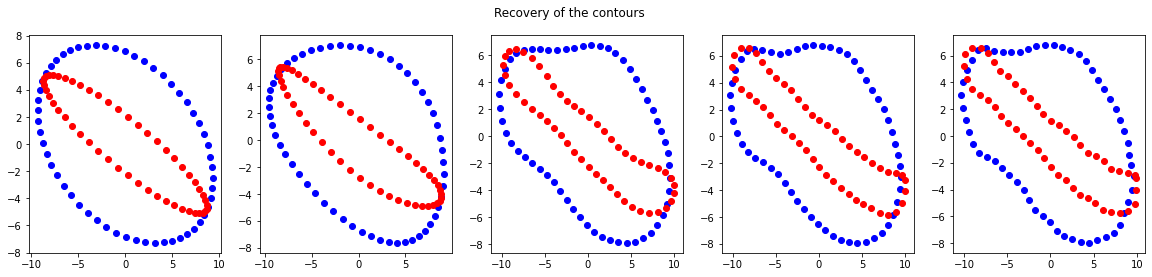

In [14]:
# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot recovery for a zero image
for i in range(0, 5):
    descriptors_zero = get_descriptors_(zero)

    positive_bins = range(1, descr_set_sizes[i] + 1)
    negative_bins = range(-descr_set_sizes[i], 0)
    selected_bins = np.concatenate((positive_bins, negative_bins))

    descriptors_zero_cut = np.zeros_like(descriptors_zero)
    descriptors_zero_cut[selected_bins] = descriptors_zero[selected_bins]
    complexes_ifft_zero = np.fft.ifft(descriptors_zero_cut)
    [x_zero, y_zero] = [np.real(complexes_ifft_zero), np.imag(complexes_ifft_zero)]
    axes[i].scatter(x_zero, y_zero, c="blue", label="Zero")

# Plot recovery for a one image
for i in range(0, 5):
    descriptors_one = get_descriptors_(one)

    positive_bins = range(1, descr_set_sizes[i] + 1)
    negative_bins = range(-descr_set_sizes[i], 0)
    selected_bins = np.concatenate((positive_bins, negative_bins))

    descriptors_one_cut = np.zeros_like(descriptors_one)
    descriptors_one_cut[selected_bins] = descriptors_one[selected_bins]

    complexes_ifft_one = np.fft.ifft(descriptors_one_cut)
    [x_one, y_one] = [np.real(complexes_ifft_one), np.imag(complexes_ifft_one)]

    axes[i].scatter(x_one, y_one, c="red", label="One")

fig.suptitle("Recovery of the contours")
plt.show()

#### Discussion

TODO

### 1.4 Clustering (2 pts)

In [15]:
def get_freqs_for_cluster(img_, dist):
    contours = find_contours(img_)

    points = sample_contours(contours, dist)

    complexes = 1j * points[:, 1] + points[:, 0]
    complexes_fft = np.fft.fft(complexes)

    n = complexes_fft.size
    timestamp = dist

    freq = np.fft.fftfreq(n, d=timestamp)

    return np.abs(
        np.vstack(
            [np.real(complexes_fft[freq >= 0]), np.imag(complexes_fft[freq >= 0])]
        ).T
    )


# with DC component

In [16]:
# TODO: You should fill the lists below, with your features

# First feature for all "0"s
zeros_f1 = []
# Second feature for all "0"s
zeros_f2 = []
# Fist feature for all "1"s
ones_f1 = []
# Second feature for all "1"s
ones_f2 = []

for zero in zeros:
    x_zero, y_zero = get_freqs_for_cluster(zero, 1).T
    point = x_zero + 1j * y_zero
    amp_point = np.abs(
        point
    )  # en prenant l'amplitude, est-ce que je suis deja invariant a la rot?
    zeros_f1.append(amp_point[1])
    zeros_f2.append(amp_point[2])

for one in ones:
    x_one, y_one = get_freqs_for_cluster(one, 1).T
    point = x_one + 1j * y_one
    amp_point = np.abs(point)
    ones_f1.append(amp_point[1])
    ones_f2.append(amp_point[2])

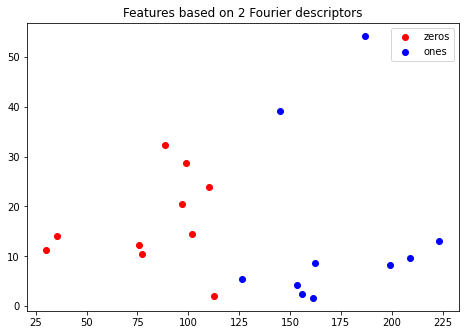

In [17]:
# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(zeros_f1, zeros_f2, color="r", label="zeros")
ax.scatter(ones_f1, ones_f2, color="b", label="ones")
ax.legend(loc="best")
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


TODO

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

In [18]:
# translation affects only the DC component
# A rotation affect the phase of all the descriptors by the same amount, and does not modify their amplitude
# A scaling does not change the ratio => diviser par la norme ?


TODO

#### Implementation

In [19]:
# problemes: je sais pas quoi prendre si c'est pas la magnitude du fourier descriptor
# rot marche pas, ni scale, je devrais checker le cours 1

In [20]:
# TODO: Implement a function that takes as input an image and outputs
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.


def get_invariant_features(
    img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False
):
    x, y = get_freqs_for_cluster(img, 1).T
    point = x + 1j * y
    if (
        inv_to_translation == True
    ):  # en fait je vois pas quoi prendre autre que l'amplitude pour tout
        point = point[1:]
        amp_point = np.abs(point)
    if inv_to_rotation == True:  # pas sure
        amp_point = np.abs(point)
    if inv_to_scale == True:  # marche pas
        norm = np.linalg.norm(point)
        amp_point = np.abs(point)
        amp_point = amp_point / norm

    return amp_point

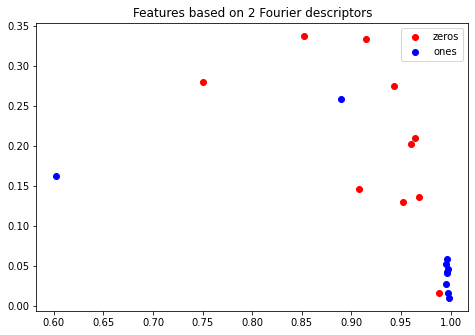

In [21]:
# First feature for all "0"s
zeros_f1 = []
# Second feature for all "0"s
zeros_f2 = []
# Fist feature for all "1"s
ones_f1 = []
# Second feature for all "1"s
ones_f2 = []

for zero in zeros:
    amp_point = get_invariant_features(zero, True, True, True)
    zeros_f1.append(amp_point[0])
    zeros_f2.append(amp_point[1])

for one in ones:
    amp_point = get_invariant_features(one, True, True, True)
    ones_f1.append(amp_point[0])
    ones_f2.append(amp_point[1])

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(zeros_f1, zeros_f2, color="r", label="zeros")
ax.scatter(ones_f1, ones_f2, color="b", label="ones")
ax.legend(loc="best")
plt.title("Features based on 2 Fourier descriptors")
plt.show()

In [22]:
import random
from skimage.transform import AffineTransform, warp, rotate, rescale

# Define custom rotation function. You may add other parameters to the function.
def random_rotate(
    img, max_angle
):  # pas specialement ouf... okay ouais ca marche pas, en tout cas, ca change l'image
    angle = random.uniform(-max_angle, max_angle)
    rotated_img = rotate(img, angle, preserve_range=True)

    return rotated_img


# Define custom rotation function. You may add other parameters to the function.
def random_translate(img, max_shift):
    delta_x = random.randint(-max_shift, max_shift)
    delta_y = random.randint(-max_shift, max_shift)

    img_shifted = np.zeros_like(img)
    transform = AffineTransform(translation=(delta_x, delta_y))

    img_shifted = warp(img, transform, preserve_range=True)

    return img_shifted


# Define custom rotation function. You may add other parameters to the function.
def random_scale(img, max_scale):  # encore moins ouf,
    scale_factor = random.uniform(
        1 / max_scale, max_scale
    )  # pour plus petit et plus grand
    scaled_img = rescale(img, scale_factor, preserve_range=True)

    return scaled_img

In [23]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = []
rotated_images_ones = []

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = []
translated_images_ones = []

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = []
scaled_images_ones = []

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = []
transformed_images_ones = []

for zero in zeros:
    zero_shift = random_translate(zero, 2)
    zero_rotate = random_rotate(zero, 360)
    zero_scale = random_scale(zero, 5)
    translated_images_zeros.append(zero_shift)
    rotated_images_zeros.append(
        threshold(preprocess(zero_rotate, median_blur=True), 20)
    )
    scaled_images_zeros.append(threshold(preprocess(zero_scale, threshold=30), 20))

for one in ones:
    one_shift = random_translate(one, 2)
    one_rotate = random_rotate(one, 360)
    one_scale = random_scale(one, 5)
    translated_images_ones.append(one_shift)
    rotated_images_ones.append(threshold(preprocess(one_rotate, median_blur=True), 20))
    scaled_images_ones.append(
        threshold(preprocess(one_scale, threshold=30, median_blur=True), 20)
    )
    # bon en fait c de la merde car je suis obligee de re preprocess, donc ca va pas marcher avec les images, a moins
    # que j utilise les trucs du cours 1
    # je vais plutot tenter avec les contours

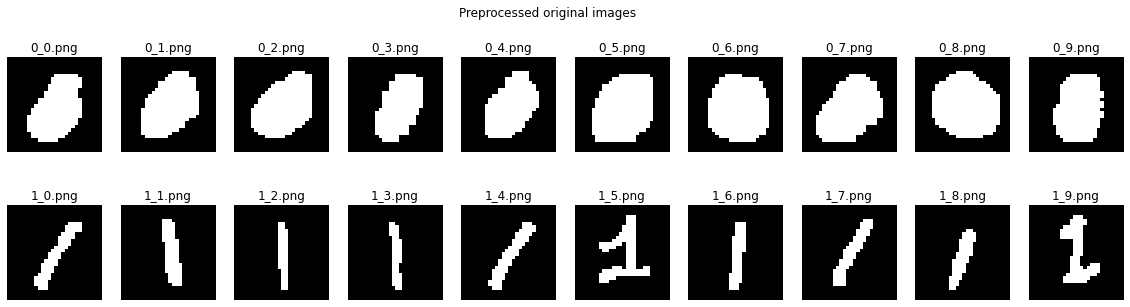

In [24]:
# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Preprocessed original images")
plt.show()

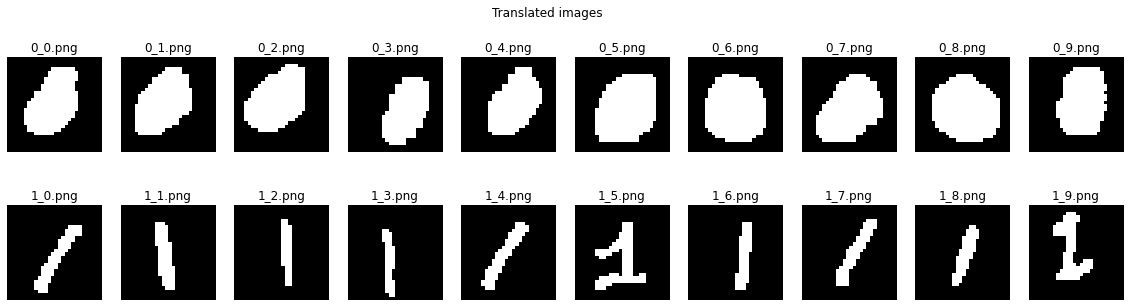

In [25]:
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], translated_images_zeros, zeros_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], translated_images_ones, ones_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Translated images")
plt.show()

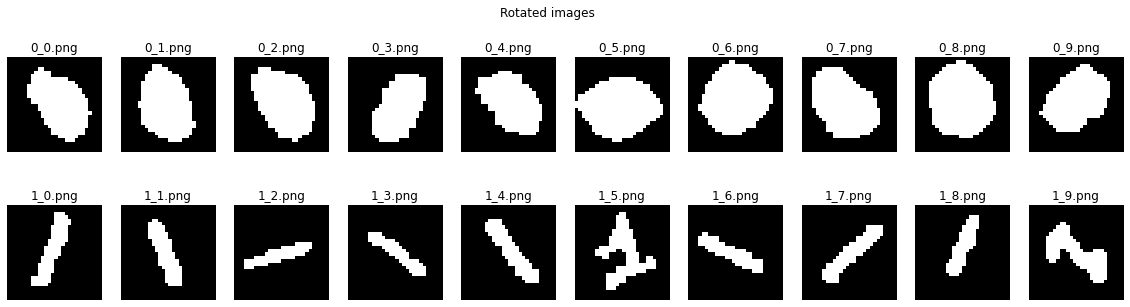

In [26]:
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], rotated_images_zeros, zeros_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], rotated_images_ones, ones_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Rotated images")
plt.show()

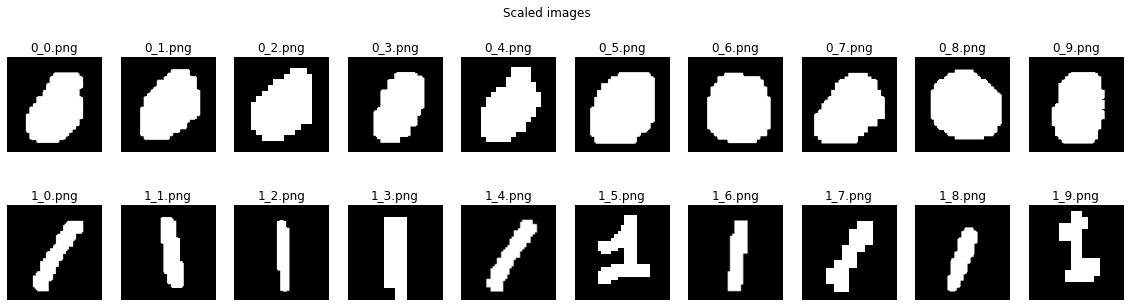

In [27]:
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], scaled_images_zeros, zeros_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], scaled_images_ones, ones_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Scaled images")
plt.show()

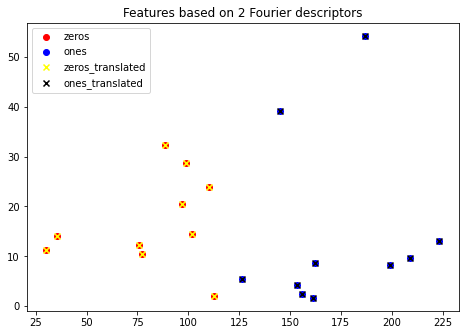

In [28]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invariant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!


# First feature for all "0"s
zeros_f1 = []
zeros_f1_translated = []
# Second feature for all "0"s
zeros_f2 = []
zeros_f2_translated = []
# Fist feature for all "1"s
ones_f1 = []
ones_f1_translated = []
# Second feature for all "1"s
ones_f2 = []
ones_f2_translated = []

for zero in zeros:
    amp_point = get_invariant_features(
        zero, inv_to_rotation=False, inv_to_translation=True, inv_to_scale=False
    )
    zeros_f1.append(amp_point[0])
    zeros_f2.append(amp_point[1])

for zero in translated_images_zeros:
    amp_point = get_invariant_features(
        zero, inv_to_rotation=False, inv_to_translation=True, inv_to_scale=False
    )
    zeros_f1_translated.append(amp_point[0])
    zeros_f2_translated.append(amp_point[1])

for one in ones:
    amp_point = get_invariant_features(
        one, inv_to_rotation=False, inv_to_translation=True, inv_to_scale=False
    )
    ones_f1.append(amp_point[0])
    ones_f2.append(amp_point[1])

for one in translated_images_ones:
    amp_point = get_invariant_features(
        one, inv_to_rotation=False, inv_to_translation=True, inv_to_scale=False
    )
    ones_f1_translated.append(amp_point[0])
    ones_f2_translated.append(amp_point[1])


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(zeros_f1, zeros_f2, color="r", label="zeros")
ax.scatter(ones_f1, ones_f2, color="b", label="ones")
ax.scatter(
    zeros_f1_translated,
    zeros_f2_translated,
    color="yellow",
    marker="x",
    label="zeros_translated",
)
ax.scatter(
    ones_f1_translated,
    ones_f2_translated,
    color="black",
    marker="x",
    label="ones_translated",
)
ax.legend(loc="best")
# ax.set_xlim([0,120])
# ax.set_ylim([0,50])
plt.title("Features based on 2 Fourier descriptors")
plt.show()

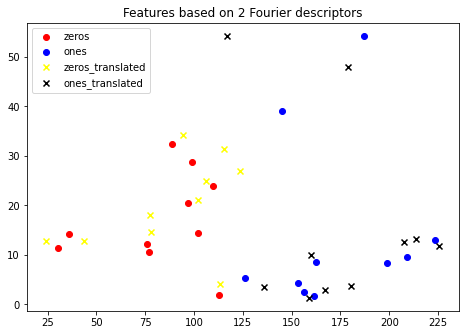

In [29]:
# First feature for all "0"s
zeros_f1 = []
zeros_f1_rotated = []
# Second feature for all "0"s
zeros_f2 = []
zeros_f2_rotated = []
# Fist feature for all "1"s
ones_f1 = []
ones_f1_rotated = []
# Second feature for all "1"s
ones_f2 = []
ones_f2_rotated = []

for zero in zeros:
    amp_point = get_invariant_features(
        zero, inv_to_rotation=True, inv_to_translation=False, inv_to_scale=False
    )
    zeros_f1.append(amp_point[1])
    zeros_f2.append(amp_point[2])

for zero in rotated_images_zeros:
    amp_point = get_invariant_features(
        zero, inv_to_rotation=True, inv_to_translation=False, inv_to_scale=False
    )
    zeros_f1_rotated.append(amp_point[1])
    zeros_f2_rotated.append(amp_point[2])

for one in ones:
    amp_point = get_invariant_features(
        one, inv_to_rotation=True, inv_to_translation=False, inv_to_scale=False
    )
    ones_f1.append(amp_point[1])
    ones_f2.append(amp_point[2])

for one in rotated_images_ones:
    amp_point = get_invariant_features(
        one, inv_to_rotation=True, inv_to_translation=False, inv_to_scale=False
    )
    ones_f1_rotated.append(amp_point[1])
    ones_f2_rotated.append(amp_point[2])


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(zeros_f1, zeros_f2, color="r", label="zeros")
ax.scatter(ones_f1, ones_f2, color="b", label="ones")
ax.scatter(
    zeros_f1_rotated,
    zeros_f2_rotated,
    color="yellow",
    marker="x",
    label="zeros_translated",
)
ax.scatter(
    ones_f1_rotated, ones_f2_rotated, color="black", marker="x", label="ones_translated"
)
ax.legend(loc="best")
# ax.set_xlim([0,120])
# ax.set_ylim([0,50])
plt.title("Features based on 2 Fourier descriptors")
plt.show()

In [30]:
def random_translate_contour(img, max_shift):
    contour = find_contours(img)

    delta_x = random.randint(-max_shift, max_shift)
    delta_y = random.randint(-max_shift, max_shift)

    contour[0][:, 0] = contour[0][:, 0] + delta_x
    contour[0][:, 1] = contour[0][:, 1] + delta_y

    return contour

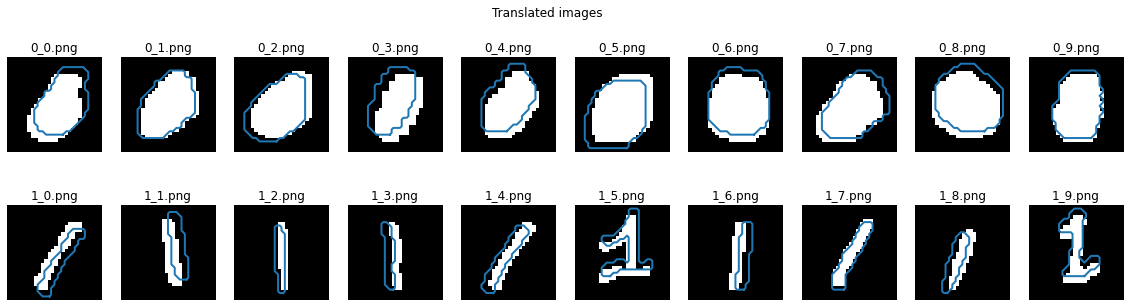

In [31]:
# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    contour_translate = random_translate_contour(im, 2)
    ax.plot(contour_translate[0][:, 1], contour_translate[0][:, 0], linewidth=2)
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    contour_translate = random_translate_contour(im, 2)
    ax.plot(contour_translate[0][:, 1], contour_translate[0][:, 0], linewidth=2)
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Translated images")
plt.show()

In [44]:
def random_scale_contour(img, max_scale):
    contour = find_contours(img)

    scale = random.uniform(1 / 2 * max_scale, max_scale)

    contour[0][:,0]= contour[0][:,0] * scale
    contour[0][:,1]= contour[0][:,1] * scale
    return contour

    # pour centrer le scaling
    # centroid = np.mean(contour[0], axis=0)
    # scaled_contour = (contour[0] - centroid) * scale + centroid
    # return np.array([scaled_contour])

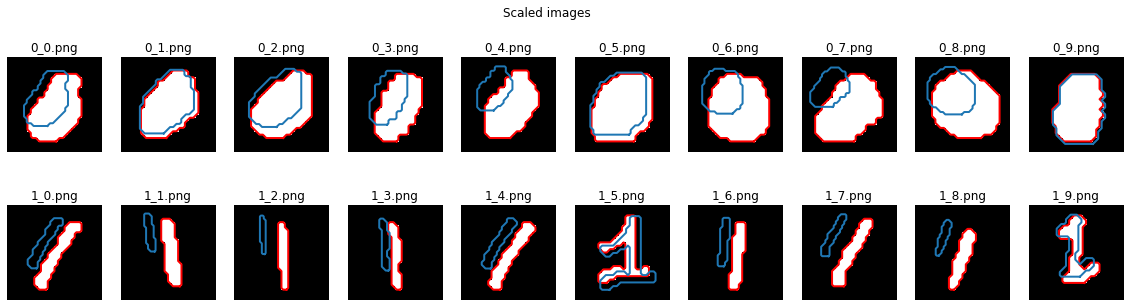

In [76]:
# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    contour_translate = random_scale_contour(im, 1.1)
    contour_orig= find_contours(im)
    ax.plot(contour_orig[0][:, 1], contour_orig[0][:, 0], linewidth=2, color='red')
    ax.plot(contour_translate[0][:, 1], contour_translate[0][:, 0], linewidth=2)
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    contour_translate = random_scale_contour(im, 1.1)
    contour_orig= find_contours(im)
    ax.plot(contour_orig[0][:,1], contour_orig[0][:, 0], linewidth=2, color='red')
    ax.plot(contour_translate[0][:, 1], contour_translate[0][:, 0], linewidth=2)
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Scaled images")
plt.show()

In [34]:
def random_rotate_contour(img, max_angle):
    contour = find_contours(img)
    angle = random.uniform(-max_angle, max_angle) * np.pi

    rotation_matrix = np.array(
        [[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]
    )

    rotated_contour = contour @ rotation_matrix

    return rotated_contour

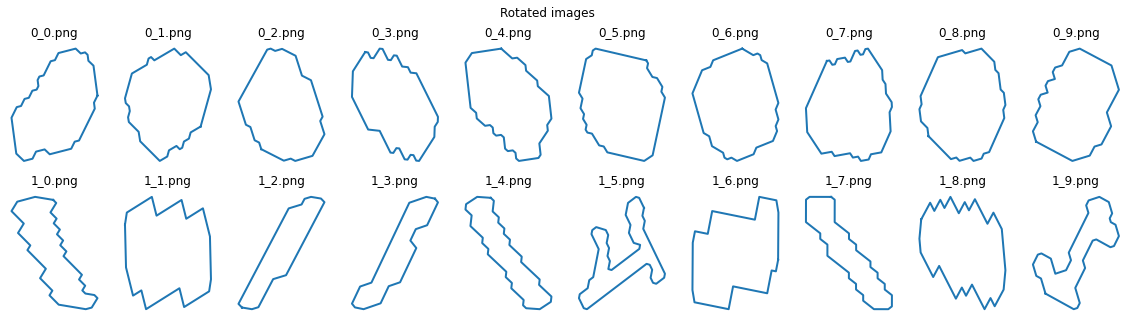

In [35]:
# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(20, 5))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    contour_translate = random_rotate_contour(im, 1)
    ax.plot(contour_translate[0][:, 1], contour_translate[0][:, 0], linewidth=2)
    # ax.imshow(im, cmap='gray')
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    contour_translate = random_rotate_contour(im, 1)
    ax.plot(contour_translate[0][:, 1], contour_translate[0][:, 0], linewidth=2)
    # ax.imshow(im, cmap='gray')
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Rotated images")
plt.show()

In [73]:
def get_invariant_features_contour(
    img=[],
    contour=[],
    img_bool=True,
    inv_to_rotation=False,
    inv_to_translation=False,
    inv_to_scale=False,
):

    if img_bool == True:
        x, y = get_freqs_for_cluster(img, 1).T

    if img_bool == False:

        points = sample_contours(contour, 1)

        complexes = 1j * points[:, 1] + points[:, 0]
        complexes_fft = np.fft.fft(complexes)
        n = complexes_fft.size
        timestamp = 1
        freq = np.fft.fftfreq(n, d=timestamp)
        x, y = (
            np.abs(
                np.vstack(
                    [
                        np.real(complexes_fft[freq >= 0]),
                        np.imag(complexes_fft[freq >= 0]),
                    ]
                ).T
            )
        ).T

    point = x + 1j * y
    point_norm = point[5]
    amp_point = np.abs(point)
    if (
        inv_to_translation == True
    ):  # en fait je vois pas quoi prendre autre que l'amplitude pour tout
        point = point[1:]
        amp_point = np.abs(point)
    if inv_to_rotation == True:
        amp_point = np.abs(point)
    if inv_to_scale == True:  # marche pas
        norm = np.linalg.norm(abs(point))
        amp_point = np.abs(point)
        amp_point = amp_point / np.abs(point_norm)

    return amp_point

In [74]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = []
rotated_images_ones = []

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = []
translated_images_ones = []

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = []
scaled_images_ones = []

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = []
transformed_images_ones = []

for zero in zeros:
    zero_shift = random_translate_contour(zero, 2)
    zero_rotate = random_rotate_contour(zero, 1)
    zero_scale = random_scale_contour(zero, 1.1)
    translated_images_zeros.append(zero_shift)
    rotated_images_zeros.append(zero_rotate)
    scaled_images_zeros.append(zero_scale)

for one in ones:
    one_shift = random_translate_contour(one, 2)
    one_rotate = random_rotate_contour(one, 1)
    one_scale = random_scale_contour(one, 1.1)
    translated_images_ones.append(one_shift)
    rotated_images_ones.append(one_rotate)
    scaled_images_ones.append(one_scale)

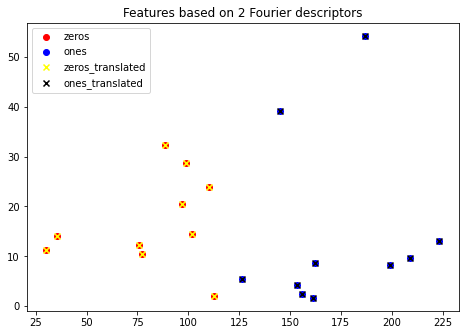

In [68]:
# First feature for all "0"s
zeros_f1 = []
zeros_f1_translated = []
# Second feature for all "0"s
zeros_f2 = []
zeros_f2_translated = []
# Fist feature for all "1"s
ones_f1 = []
ones_f1_translated = []
# Second feature for all "1"s
ones_f2 = []
ones_f2_translated = []

for zero in zeros:
    amp_point = get_invariant_features_contour(
        img=zero, inv_to_rotation=False, inv_to_translation=True, inv_to_scale=False
    )
    zeros_f1.append(amp_point[0])
    zeros_f2.append(amp_point[1])

for zero in translated_images_zeros:
    amp_point = get_invariant_features_contour(
        contour=zero,
        img_bool=False,
        inv_to_rotation=False,
        inv_to_translation=True,
        inv_to_scale=False,
    )
    zeros_f1_translated.append(amp_point[0])
    zeros_f2_translated.append(amp_point[1])

for one in ones:
    amp_point = get_invariant_features_contour(
        img=one, inv_to_rotation=False, inv_to_translation=True, inv_to_scale=False
    )
    ones_f1.append(amp_point[0])
    ones_f2.append(amp_point[1])

for one in translated_images_ones:
    amp_point = get_invariant_features_contour(
        contour=one,
        img_bool=False,
        inv_to_rotation=False,
        inv_to_translation=True,
        inv_to_scale=False,
    )
    ones_f1_translated.append(amp_point[0])
    ones_f2_translated.append(amp_point[1])


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(zeros_f1, zeros_f2, color="r", label="zeros")
ax.scatter(ones_f1, ones_f2, color="b", label="ones")
ax.scatter(
    zeros_f1_translated,
    zeros_f2_translated,
    color="yellow",
    marker="x",
    label="zeros_translated",
)
ax.scatter(
    ones_f1_translated,
    ones_f2_translated,
    color="black",
    marker="x",
    label="ones_translated",
)
ax.legend(loc="best")
# ax.set_xlim([0,120])
# ax.set_ylim([0,50])
plt.title("Features based on 2 Fourier descriptors")
plt.show()

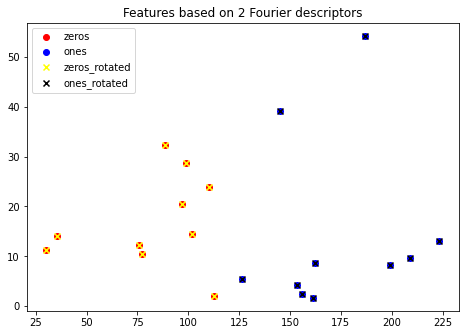

In [69]:
# First feature for all "0"s
zeros_f1 = []
zeros_f1_rotated = []
# Second feature for all "0"s
zeros_f2 = []
zeros_f2_rotated = []
# Fist feature for all "1"s
ones_f1 = []
ones_f1_rotated = []
# Second feature for all "1"s
ones_f2 = []
ones_f2_rotated = []

for zero in zeros:
    amp_point = get_invariant_features_contour(
        img=zero, inv_to_rotation=True, inv_to_translation=False, inv_to_scale=False
    )
    zeros_f1.append(amp_point[1])
    zeros_f2.append(amp_point[2])

for zero in rotated_images_zeros:
    amp_point = get_invariant_features_contour(
        contour=zero,
        img_bool=False,
        inv_to_rotation=True,
        inv_to_translation=False,
        inv_to_scale=False,
    )
    zeros_f1_rotated.append(amp_point[1])
    zeros_f2_rotated.append(amp_point[2])

for one in ones:
    amp_point = get_invariant_features_contour(
        img=one, inv_to_rotation=True, inv_to_translation=False, inv_to_scale=False
    )
    ones_f1.append(amp_point[1])
    ones_f2.append(amp_point[2])

for one in rotated_images_ones:
    amp_point = get_invariant_features_contour(
        contour=one,
        img_bool=False,
        inv_to_rotation=True,
        inv_to_translation=False,
        inv_to_scale=False,
    )
    ones_f1_rotated.append(amp_point[1])
    ones_f2_rotated.append(amp_point[2])


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(zeros_f1, zeros_f2, color="r", label="zeros")
ax.scatter(ones_f1, ones_f2, color="b", label="ones")
ax.scatter(
    zeros_f1_rotated,
    zeros_f2_rotated,
    color="yellow",
    marker="x",
    label="zeros_rotated",
)
ax.scatter(
    ones_f1_rotated, ones_f2_rotated, color="black", marker="x", label="ones_rotated"
)
ax.legend(loc="best")
# ax.set_xlim([0,120])
# ax.set_ylim([0,50])
plt.title("Features based on 2 Fourier descriptors")
plt.show()

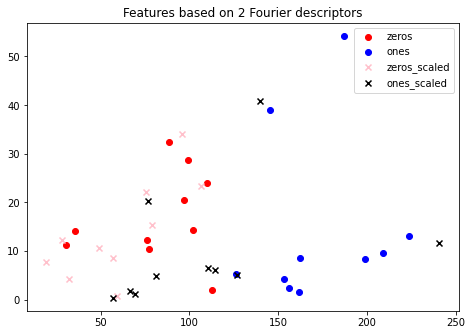

In [75]:
# First feature for all "0"s
zeros_f1 = []
zeros_f1_scaled = []
# Second feature for all "0"s
zeros_f2 = []
zeros_f2_scaled = []
# Fist feature for all "1"s
ones_f1 = []
ones_f1_scaled = []
# Second feature for all "1"s
ones_f2 = []
ones_f2_scaled = []

for zero in zeros:
    amp_point = get_invariant_features_contour(
        img=zero,
        inv_to_rotation=False,
        inv_to_translation=False,
        inv_to_scale=False,
    )
    zeros_f1.append(amp_point[1])
    zeros_f2.append(amp_point[2])

for zero in scaled_images_zeros:
    amp_point = get_invariant_features_contour(
        contour=zero,
        img_bool=False,
        inv_to_rotation=False,
        inv_to_translation=False,
        inv_to_scale=False,
    )
    zeros_f1_scaled.append(amp_point[1])
    zeros_f2_scaled.append(amp_point[2])

for one in ones:
    amp_point = get_invariant_features_contour(
        img=one,
        inv_to_rotation=False,
        inv_to_translation=False,
        inv_to_scale=False,
    )
    ones_f1.append(amp_point[1])
    ones_f2.append(amp_point[2])

for one in scaled_images_ones:
    amp_point = get_invariant_features_contour(
        contour=one,
        img_bool=False,
        inv_to_rotation=False,
        inv_to_translation=False,
        inv_to_scale=False,
    )
    ones_f1_scaled.append(amp_point[1])
    ones_f2_scaled.append(amp_point[2])


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(zeros_f1, zeros_f2, color="r", label="zeros")
ax.scatter(ones_f1, ones_f2, color="b", label="ones")
ax.scatter(
    zeros_f1_scaled, zeros_f2_scaled, color="pink", marker="x", label="zeros_scaled"
)
ax.scatter(
    ones_f1_scaled, ones_f2_scaled, color="black", marker="x", label="ones_scaled"
)
ax.legend(loc="best")
# ax.set_xlim([0,120])
# ax.set_ylim([0,50])
plt.title("Features based on 2 Fourier descriptors")
plt.show()

# bon je give up sur scale, ca marche pas

#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

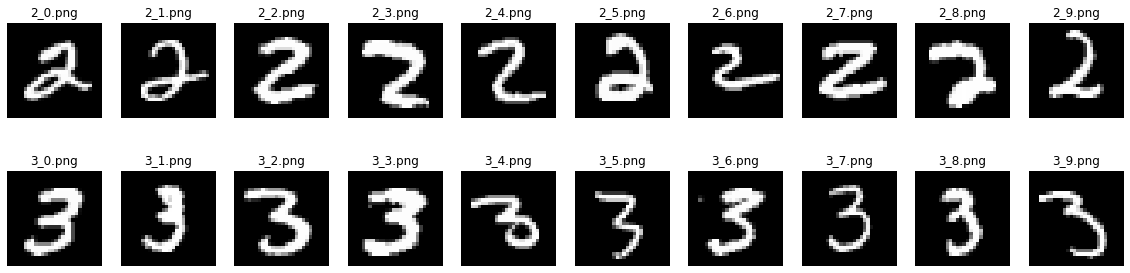

In [145]:
fig, axes = plt.subplots(2, len(twos_im), figsize=(20, 5))

for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap="gray", interpolation="nearest")
    ax.axis("off")
    ax.set_title(nm)

C:\Users\User\AppData\Local\Temp\ipykernel_2448\4285932265.py:6: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  pre = skimage.morphology.remove_small_holes(pre,200)


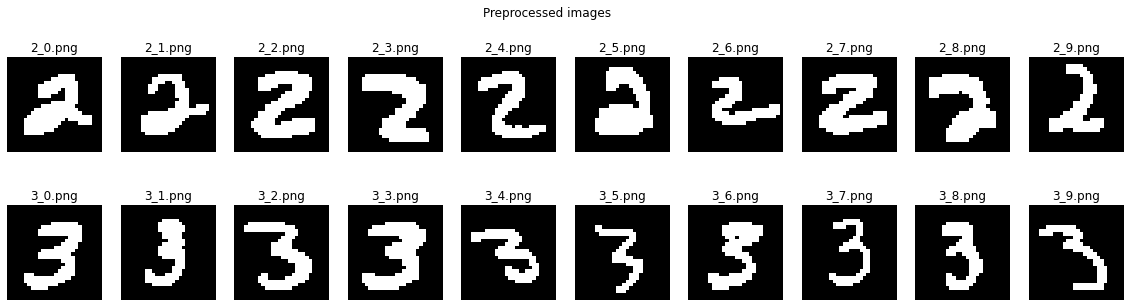

In [146]:
twos = []
threes = []

for img in twos_im:
    img_pre = preprocess(img, True)
    img_th = threshold(img_pre, 20)
    twos.append(img_th)
for img in threes_im:
    img_pre = preprocess(img)
    img_th = threshold(img_pre, 60)
    threes.append(img_th)

# Plot images
fig, axes = plt.subplots(2, len(twos), figsize=(20, 5))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

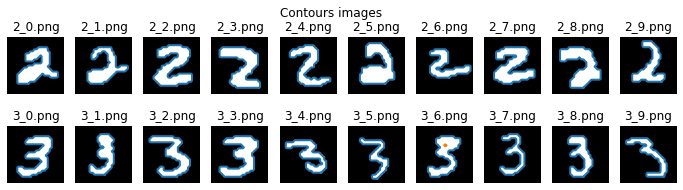

In [147]:
# Plot contours
fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
    contours = skimage.measure.find_contours(im)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap="gray")
    ax.axis("off")
    ax.set_title(nm)
    contours = skimage.measure.find_contours(im)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
fig.suptitle("Contours images")
plt.show()

In [150]:
def area(img):
    binary_img = img > 100
    return np.count_nonzero(binary_img != 0)


def perimeter(img):
    binary_img = img > 100
    return skimage.measure.perimeter(binary_img)

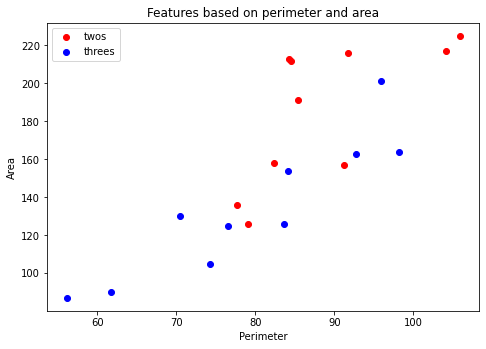

In [152]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = []
twos_f2 = []
threes_f1 = []
threes_f2 = []

for two in twos:
    perimeter_ = perimeter(two)
    area_ = area(two)
    twos_f1.append(perimeter_)
    twos_f2.append(area_)


for three in threes:
    perimeter_ = perimeter(three)
    area_ = area(three)
    threes_f1.append(perimeter_)
    threes_f2.append(area_)

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(twos_f1, twos_f2, color="r", label="twos")
ax.scatter(threes_f1, threes_f2, color="b", label="threes")
ax.set_xlabel("Perimeter")
ax.set_ylabel("Area")
ax.legend(loc="best")
plt.title("Features based on perimeter and area")
plt.show()

In [490]:
def compacity(img):
    return perimeter(img) ** 2 / area(img)

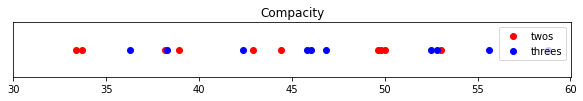

In [491]:
# TODO: Make the 1D plot of the compacity
compacity_twos = [compacity(img) for img in twos]
compacity_threes = [compacity(img) for img in threes]

plt.figure(figsize=(10, 1))
plt.plot(compacity_twos, np.zeros_like(compacity_twos), "o", color="r", label="twos")
plt.plot(
    compacity_threes, np.zeros_like(compacity_threes), "o", color="b", label="threes"
)
plt.legend()
plt.yticks([])
plt.xticks(np.arange(30, 65, 5))
plt.title("Compacity")
plt.show()

####  Discussion

TODO

### 2.2. Additional method (4 pts)

In [ ]:
# TODO


#### Discussion

TODO